In [39]:
# Multiple Linear Regression

import numpy as np
import pandas as pd

# Importing the datasets

# 数据读取
soil_numb = pd.read_excel('./dataset/14-soil-carbaon.xls')  # 土壤数据
soil_numb = soil_numb.round({'SOC土壤有机碳': 2, 'SIC土壤无机碳': 2, 'STC土壤全碳': 2, '全氮N': 2, '土壤C/N比': 2})
# soil_numb
soil_numb['放牧小区（plot）'] = soil_numb['放牧小区（plot）'].map(lambda x:x.split('G')[1]).astype('int')
intensity = {"NG":0, 'LGI':2, 'MGI':4, 'HGI':8}
soil_numb['放牧强度（intensity）']  = soil_numb['放牧强度（intensity）'].map(intensity)
soil_numb['放牧强度（intensity）']

0      0
1      0
2      0
3      2
4      2
      ..
127    4
128    4
129    8
130    8
131    8
Name: 放牧强度（intensity）, Length: 132, dtype: int64

In [45]:
# 处理一些冲突
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 设置字体
plt.rcParams["axes.unicode_minus"] = False  # 该语句解决图像中的“-”负号的乱码问题

In [40]:
soil_numb

,year,放牧小区（plot）,放牧强度（intensity）,SOC土壤有机碳,SIC土壤无机碳,STC土壤全碳,全氮N,土壤C/N比
0,2012,17,0,17.05,11.30,28.35,2.19,12.93
1,2012,19,0,19.53,11.33,30.86,1.88,16.39
2,2012,21,0,14.55,9.60,24.15,1.87,13.82
3,2012,6,2,18.67,12.67,31.34,2.41,12.16
4,2012,12,2,13.90,8.13,22.04,1.93,11.40
...,...,...,...,...,...,...,...,...
127,2020,11,4,14.74,3.35,18.10,1.96,9.23
128,2020,16,4,14.78,9.82,24.60,1.71,14.36
129,2020,9,8,17.20,3.12,20.32,2.24,9.08
130,2020,13,8,16.69,3.56,20.26,2.10,9.63


In [41]:
soil_numb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             132 non-null    int64  
 1   放牧小区（plot）       132 non-null    int32  
 2   放牧强度（intensity）  132 non-null    int64  
 3   SOC土壤有机碳         132 non-null    float64
 4   SIC土壤无机碳         132 non-null    float64
 5   STC土壤全碳          132 non-null    float64
 6   全氮N              132 non-null    float64
 7   土壤C/N比           132 non-null    float64
dtypes: float64(5), int32(1), int64(2)
memory usage: 7.9 KB


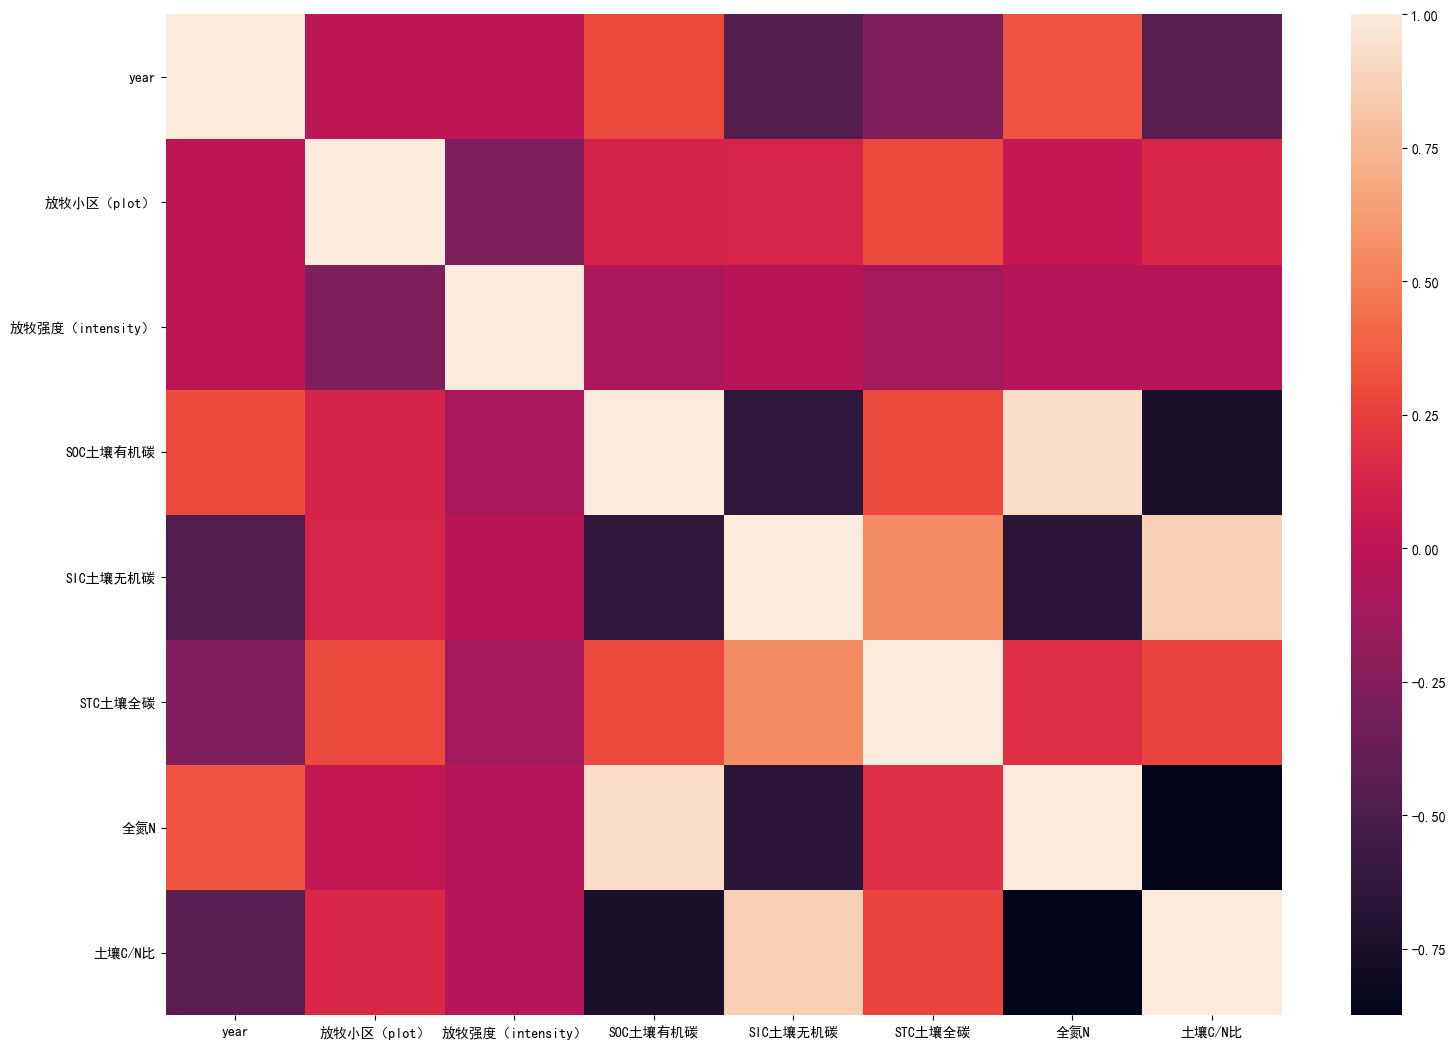

In [51]:
from matplotlib import pyplot as plt
import seaborn as sns
import os

plt.figure(figsize=(18,13))
corr = soil_numb.corr()
sns.heatmap(corr)
plt.savefig('./PRS3cor.png')